Model Training

Import Data and Required Packages

In [4]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [5]:
data = pd.read_csv("./data/data.csv")
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
###Preparing X and Y variables

X = data.drop("math score",axis = 1)

In [9]:
y = data["math score"]

In [27]:
### Creating column transformer pipeline with 3 types of transformer

numeric_feature = X.select_dtypes(exclude="object").columns
cat_feature = X.select_dtypes(include="object").columns
#print(numeric_feature)
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(

    [
        ("StandardScaler",num_transformer,numeric_feature),
        ("OneHotEncoder",oh_transformer,cat_feature)

    ]
)

Index(['reading score', 'writing score'], dtype='object')


In [28]:
X = preprocessor.fit_transform(X)

In [29]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Training data has {X_train.shape[0]} data sample")
print(f"Testing data has {X_test.shape[0]} data smaple")

Training data has 800 data sample
Testing data has 200 data smaple


In [32]:
#### Creating an Evaluate function for testing the model

def eval_func(y_pred,y_test):

    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2_square = r2_score(y_test,y_pred)

    return mae,mse,rmse,r2_square



In [33]:
models = {

    "Linear Regression": LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decsion Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=True),
    "AdabostRegressor":AdaBoostRegressor()


}

In [85]:
model_result = dict()

for i in range(len(list(models.keys()))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    y_pred_train = model.predict(X_train)

    mae,mse,rmse,r2_square = eval_func(y_pred,y_test)

    tmae,tmse,trmse,tr2_square = eval_func(y_pred_train,y_train)

    

    model_result[list(models.keys())[i]] = [mae,mse,rmse,r2_square]

    print(list(models.keys())[i])    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(trmse))
    print("- Mean Absolute Error: {:.4f}".format(tmae))
    print("- R2 Score: {:.4f}".format(tr2_square))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse))
    print("- Mean Absolute Error: {:.4f}".format(mae))
    print("- R2 Score: {:.4f}".format(r2_square))
    
    print('='*35)
    print('\n')

model_result_df =pd.DataFrame(data = model_result.values(),index=model_result.keys(),columns = ["mae","mse","rmse","r2_square"])




Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7128
- Mean Absolute Error: 4.5168
- R2 Score: 0.8552
-----------------------

In [76]:
model_result_df

,mae,mse,rmse,r2_square
Linear Regression,4.214763,29.095170,5.393994,0.880433
Lasso,5.157879,42.506332,6.519688,0.825320
Ridge,4.211101,29.056272,5.390387,0.880593
K-Neighbors Regressor,5.619000,52.617000,7.253758,0.783770
Decsion Tree,6.430000,64.980000,8.061017,0.732964
Random Forest Regressor,4.630808,35.633788,5.969404,0.853563
XGBRegressor,5.070336,43.845362,6.621583,0.819817
CatBoostRegressor,4.612532,36.103658,6.008632,0.851632
AdabostRegressor,4.765229,36.290386,6.024150,0.850865


In [77]:
#### Linear Moddel

lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


Text(0.5, 1.0, 'Plot of Predicted vs Actual values')

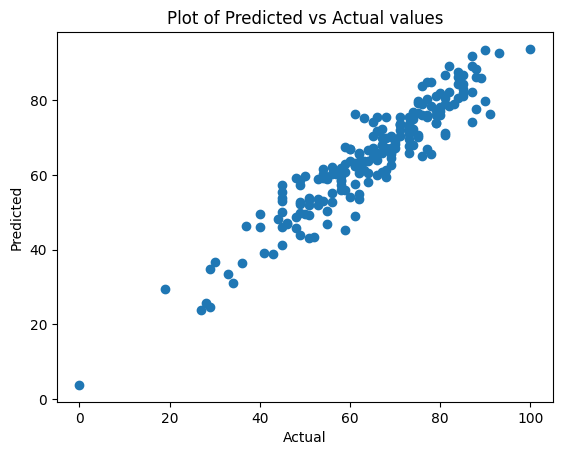

In [81]:
####Plot y_pred and y_test

plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Plot of Predicted vs Actual values")


In [82]:
#Difference between actual and predicted values

pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
